In [1]:
from google.colab import files

uploaded = files.upload()

Saving data.csv to data.csv


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from keras.layers import LeakyReLU,PReLU,ELU
from keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from ann_visualizer.visualize import ann_viz;
from graphviz import Source
from tensorflow.keras.utils import plot_model

In [3]:
import pandas as pd
import io

data = list(uploaded.keys())[0]

df = pd.read_csv(io.BytesIO(uploaded[data]))


In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.shape

(569, 33)

In [7]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

*We will drop unnamed column*

In [9]:
df=df.drop(["Unnamed: 32","id"],axis=1)

In [10]:
df.shape

(569, 31)

In [11]:
print(df['diagnosis'].unique())

['M' 'B']


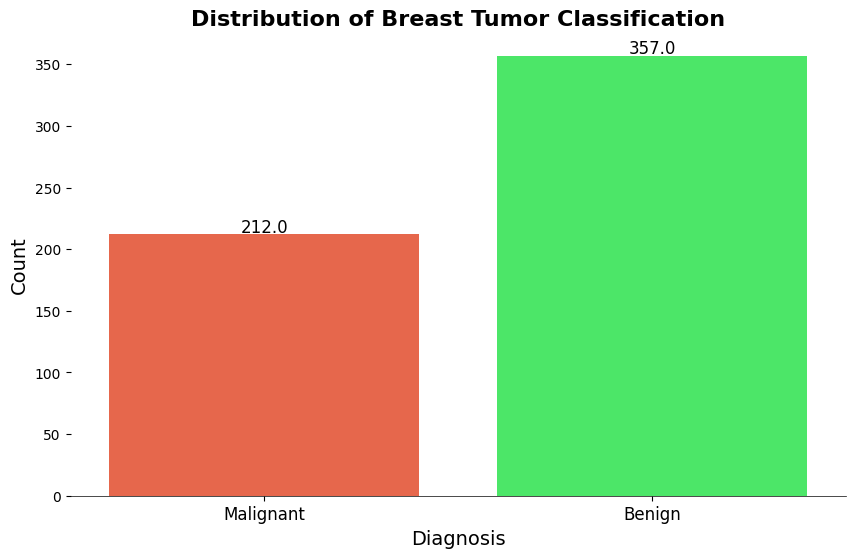

In [12]:
colors = ['#FF5733', '#33FF57']

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='diagnosis', data=df, palette=colors)

plt.title('Distribution of Breast Tumor Classification', fontsize=16, fontweight='bold')
plt.xlabel('Diagnosis', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0, 1], ['Malignant', 'Benign'], fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

sns.set(style="whitegrid")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)

plt.show()


<ipython-input-13-79142b394500>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


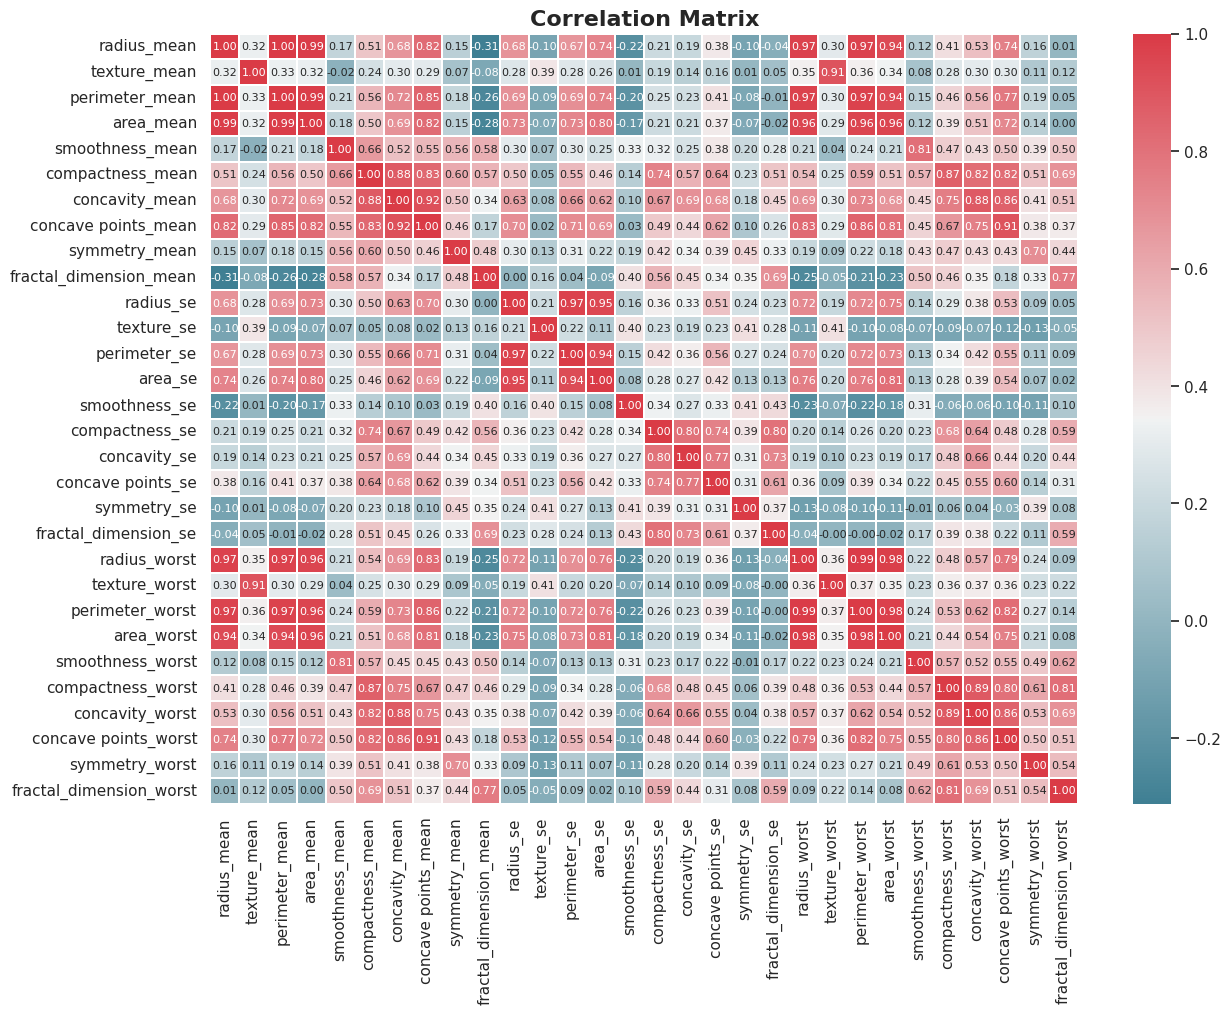

In [13]:
correlation_matrix = df.corr()

plt.figure(figsize=(14, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f",annot_kws={'size': 8}, linewidths=.1)

plt.title("Correlation Matrix", fontsize=16, fontweight='bold')
plt.show()




As we can see many features are correlated to each other so we will remove highly correlated features bigger than 0.95

In [14]:
import numpy as np

corr_matrix = df.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)
df.drop(to_drop, axis=1, inplace=True)

['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst']


<ipython-input-14-4f1f049b3aa5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()
<ipython-input-14-4f1f049b3aa5>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [15]:
len(df.columns)

24

In [16]:
y=df.diagnosis
x=df.drop("diagnosis",axis=1)

Encoding

In [17]:
diagnosis_mapping = {"M": 1, "B": 0}

y = y.map(diagnosis_mapping)


In [18]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [19]:
x.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,...,0.01587,0.03003,0.006193,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,...,0.01340,0.01389,0.003532,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,...,0.02058,0.02250,0.004571,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,...,0.01867,0.05963,0.009208,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,...,0.01885,0.01756,0.005115,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Splitting Data

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=40)

Scaling the Data

In [21]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

creat ANN model

In [29]:
model = Sequential([
    Dense(30, activation="relu", name="layer1"),
    BatchNormalization(),
    Dropout(0.5),
    Dense(15, activation="relu", name="layer2"),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation="sigmoid", name="layer3"),
])

Compiling and Fitting

In [30]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
m=model.fit(xtrain, ytrain,batch_size = 32, validation_data=(xtest, ytest),epochs =100,callbacks = [early_stop])

Epoch 1/100
15/15 [==============================] - 2s 19ms/step - loss: 0.6919 - accuracy: 0.6198 - val_loss: 0.6095 - val_accuracy: 0.8246
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 0.5656 - accuracy: 0.6923 - val_loss: 0.5220 - val_accuracy: 0.8947
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 0.4836 - accuracy: 0.7451 - val_loss: 0.4567 - val_accuracy: 0.9386
Epoch 4/100
15/15 [==============================] - 0s 7ms/step - loss: 0.4767 - accuracy: 0.7758 - val_loss: 0.3964 - val_accuracy: 0.9474
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 0.3891 - accuracy: 0.8264 - val_loss: 0.3543 - val_accuracy: 0.9474
Epoch 6/100
15/15 [==============================] - 0s 7ms/step - loss: 0.3393 - accuracy: 0.8791 - val_loss: 0.3178 - val_accuracy: 0.9474
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 0.3386 - accuracy: 0.8593 - val_loss: 0.2857 - val_accuracy: 0.9649
Epoch 8/100


In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 30)                720       
                                                                 
 batch_normalization (Batch  (None, 30)                120       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 layer2 (Dense)              (None, 15)                465       
                                                                 
 batch_normalization_1 (Bat  (None, 15)                60        
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 15)               

<Axes: >

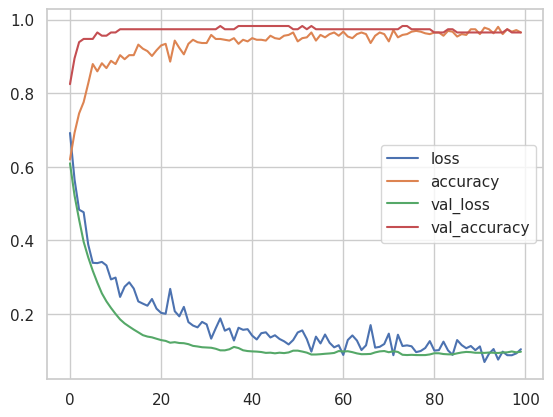

In [32]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [33]:
y_pred = model.predict(xtest)
y_pred = (y_pred>0.5)

4/4 [==============================] - 0s 6ms/step


In [35]:
cm = confusion_matrix(ytest,y_pred)
score = accuracy_score(ytest,y_pred)
print(cm)
print('score is:',score)

[[73  2]
 [ 2 37]]
score is: 0.9649122807017544


In [38]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        75
           1       0.95      0.95      0.95        39

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



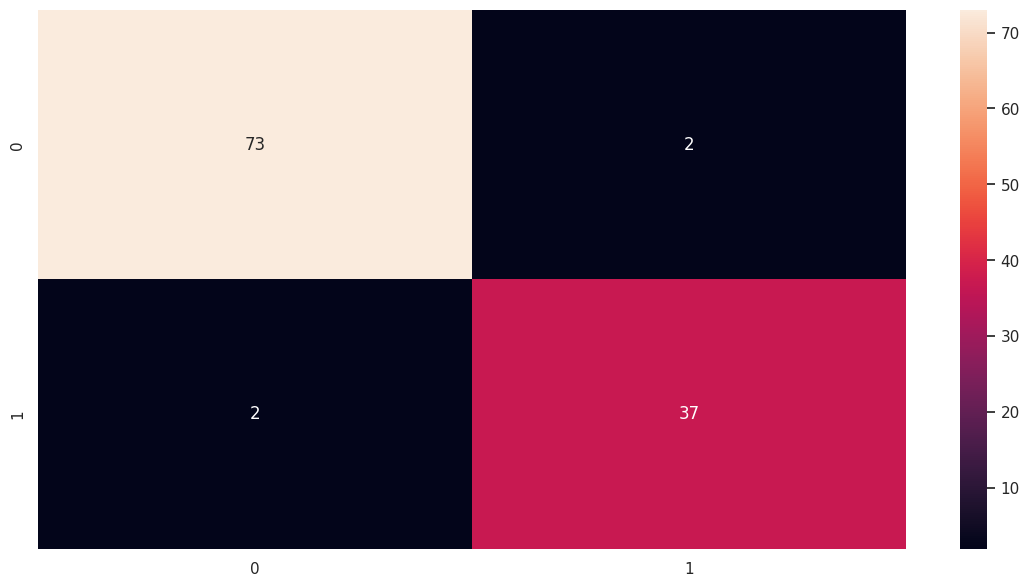

In [39]:
plt.figure(figsize=[14,7])
sns.heatmap(cm,annot=True)
plt.show()

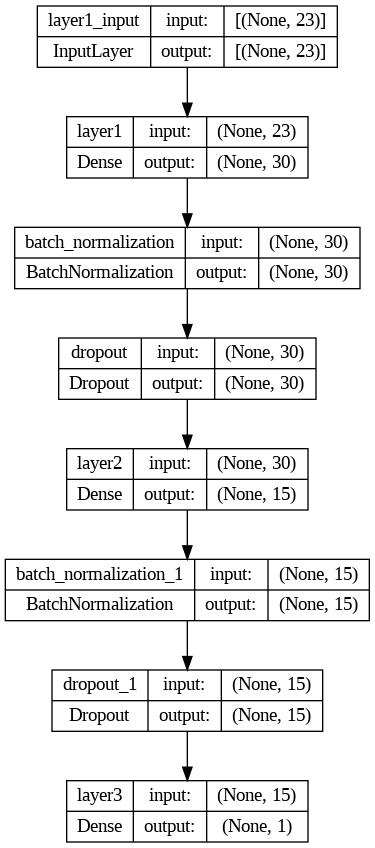

In [54]:
plot_model(model, to_file='neural_network.png', show_shapes=True, show_layer_names=True)